In [ ]:
# MINI PORTOFOLIO BY ROILAN
#  creating a binary logistic regression with Python – a statistical method to predict an outcome based
on other variables in our dataset. The word binary means that the predicted outcome has only 2 values: (1 & 0) or (yes & no).
predict floods based on the monthly rainfall index for each year

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
from google.colab import files

In [19]:
uploaded = files.upload()

Saving kerala.csv to kerala (1).csv


In [23]:
df = pd.read_csv('kerala (1).csv')

In [24]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
The info() function shows us the data type of each
column, number of columns, memory usage, and the
 number of records in the dataset:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [26]:
# The shape function displays the number of records and columns:
df.shape

(118, 16)

In [27]:
# The describe() function summarizes the dataset’s statistical properties, such as count, mean, min, and max:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [28]:
# The corr() function displays the correlation between different variables in our dataset:
df.corr()

<ipython-input-28-85fc62317d63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [ ]:
The closer to 1, the stronger the correlation between these variables.

A minus sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.

In [ ]:
replace
In order to train this Python model, we need the values of our target output
 be 0 & 1. So, we'll replace values in the Floods column (YES, NO) with (1, 0) respectively:
 in place= True means we want this replacement to be reflected in the original dataset, i.e. the change is permanent.

In [29]:
df['FLOODS'].replace(['YES', 'NO'], [1,0], inplace=True)
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [ ]:
 we choose several features that contribute most to the target output. So,
 instead of training the model using every column in our dataset, we select only those
 that have the strongest relationship with the predicted variable.

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
# all features
X= df.iloc[:,1:14]

In [32]:
# target output (floods)
Y= df.iloc[:,-1]

In [36]:
# Select the top 3 features:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

In [38]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [39]:
# Finally, we’ll combine all the features and their corresponding scores in one data frame:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
4,APR,2.498771
2,FEB,2.571626
0,YEAR,2.866463
12,DEC,11.609546
10,OCT,12.650485
3,MAR,21.696518
1,JAN,48.413088
11,NOV,284.674615
5,MAY,656.812145
8,AUG,739.975818


In [ ]:
Here, we notice that the top 3 features that are most related to the target output are:

'SEP' which is the rainfall index in September
'JUN' is the rainfall index in June
'JUL' is the rainfall index in July

In [40]:
# Build the Model
# the top 3 features
X= df[['SEP', 'JUN', 'JUL']]


In [41]:
# the target output
Y= df[['FLOODS']]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [43]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

       SEP     JUN     JUL
84   117.6   828.7   388.9
85   235.4   597.9   324.8
37   223.2   681.6   648.6
45   199.4   919.0   671.7
97   517.6   732.5   641.4
26   335.6   720.2   888.2
101   99.0   503.1   318.7
112  318.6  1042.7   830.2
21   222.4   663.1  1025.1
33    48.4   852.9   415.0
11   136.8   948.2   833.6
46   394.5   556.1   669.3
96   292.2   544.2   970.5
25   322.7   563.9   885.2
32   469.7   859.3   773.4
99   195.8   633.8   343.2
108  326.5   438.2   924.9
51    57.4   576.7   430.0
29   411.5   633.1   401.7
64   150.1   597.7   465.1
28   268.9   946.6   844.0
90    48.5  1096.1   905.5
89   103.3   528.6   635.4
54   438.5   782.4   392.8
35   286.7   620.8   672.1
43   155.0   498.9   614.1
73   383.6   266.9  1004.2
80   376.6   912.4   489.8
36   139.8   485.6   970.5
75   116.2   196.8   641.5
22   254.3   722.5  1008.7
82   421.1   322.8   583.2
113  298.8   454.4   677.8
5    131.2   414.9   954.2
105  474.8   482.4   804.0
23   289.1  1011.7  1526.5
1

In [ ]:
As a final step, we’ll evaluate how well our Python model performed
predictive analytics by running a classification report and a ROC curve.

In [ ]:
A classification report is a performance evaluation report that is used to
evaluate the performance of machine learning models by the following 5 criteria:

Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
Recall measures the model’s ability to correctly predict the true positive values.
Precision is the ratio of true positives to the sum of both true and false positives.
F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
Support is the number of actual occurrences of each class in the dataset.
Call these scores by inserting these lines of code:

In [45]:
!pip install metrics

In [46]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [47]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division=1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.8541666666666666
Recall:  0.8846153846153846
Precision: 0.8518518518518519
CL Report:               precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.85      0.88      0.87        26

    accuracy                           0.85        48
   macro avg       0.85      0.85      0.85        48
weighted avg       0.85      0.85      0.85        48



In [ ]:
As you can see, the model’s performance in numbers is:

Accuracy: 85%
Recall: 88%
Precision: 85%
We can safely conclude that this model predicted the likelihood of a flood well.

In [49]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [50]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [51]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

In [52]:
import matplotlib.pyplot as plt

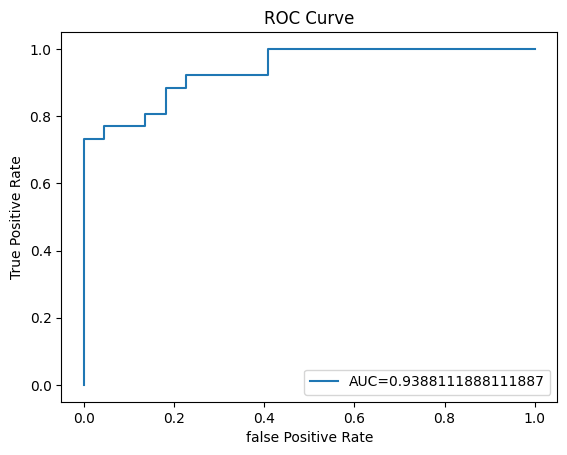

In [53]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)